# Introduction

Introduction to resume analyser (Prabhjit)

Explain at a high level what this package aims to do and explain the example

Example: Comparing resume I downloaded from www.heinz.cmu.edu to the Software Engineer Job Description Sampson sent on Slack (**citation needed**)
If we need a better resume to cite we can do it too if someone can find a better one! Or does one of us want to upload an anonymised version of our own resumes? Also, should we add a reference section?

# Getting Started with Resume Analyser

Welcome to the resumeanalyser package. This guide assumes you have successfully installed the package as per the instructions in the Installation section of our README.md file. Our package is designed to streamline the process of analyzing resumes against job descriptions, providing valuable insights for recruiters and job seekers alike. Let's dive in!

## Initial Setup
First, let's verify that resumeanalyser is installed and check its version:

In [252]:
import resumeanalyser
print(resumeanalyser.__version__)

0.1.0


# Extracting Text 
To start comparing the sample resume to the sample job description, we will first start by extracting the text from them. The sample resume, which was downloaded from Carnegie Mellon University's Heinz College, has been stored as a PDF in the `data` subdirectory under the `tests` directory of this repository, while the sample job description has been stored as a docx document under the same directory. Thankfully, our `resumeanalyser` is compatible with both .docx and .pdf documents. We will thus start the analysis by reading in the text from both sources, which will serve as the basis of our analysis for the rest of this vignette.

Now that our imports are done, we will be using `pdf_to_text` to read the text from the sample resume, and will store this as a string. This function takes in a pathname ending in `.pdf` as an input.

In [253]:
from resumeanalyser.text_reading import pdf_to_text

resume_pdf_path = "../tests/data/msppm-sample-resume.pdf"
sample_resume_text = pdf_to_text(resume_pdf_path)
print(sample_resume_text[0:50])

Polly Seapsea@andrew.cmu.edu | 412.889.4687 | link


The resume has now been read and stored under the variable `sample_resume_text`. Next, we will be using the function `docx_to_text` to extract text from the job description, and will store the text as a string. Similarly, it takes in a path name ending in `.docx` as an input,so if you run into problems with either of the text reading functions, please be sure to check your file path name and use the appropriate function.

In [254]:
from resumeanalyser.text_reading import docx_to_text

job_desc_path = "../tests/data/software_engineer_job_description.docx"
job_desc_text = docx_to_text(job_desc_path)
print(job_desc_text[0:50])

Software Engineer Job Description We are looking f


# Cleaning and Preprocessing Text
The `resumeanalyser` package provides several functions to clean and preprocess text data, ensuring it's in the best format for analysis. These functions include:
1. Removing punctuation
2. Tokenization
3. Converting to lower case
4. Removing stop words
5. Lemmatization

You can apply these functions either step-by-step to understand each part of the text cleaning process, 
or you can use the `clean_text` function to apply all these steps in one go for convenience.

## Step-by-Step Text Cleaning
Let's demonstrate each step using sample_resume_text:

### 1. Remove Punctuation
First, we eliminate punctuation from our text.

In [255]:
from resumeanalyser.text_cleaning import remove_punctuation

no_punctuation = remove_punctuation(sample_resume_text)
print("Text without Punctuation:", no_punctuation[0:50])

Text without Punctuation: Polly Seapseaandrewcmuedu  4128894687  linkedincom


### 2. Tokenization
Next, we split the text into individual words or tokens.

In [256]:
from resumeanalyser.text_cleaning import tokenize

tokens = tokenize(no_punctuation)
print("Tokenized Text:", tokens[0:10])

Tokenized Text: ['Polly', 'Seapseaandrewcmuedu', '4128894687', 'linkedincominpollysea', 'EDUCA', 'TIONCarnegieMellonUniversity', 'HJohnHeinzIIICollegePittsbur', 'ghPAMay2021Mast', 'er', 'of']


### 3. Convert to Lower Case
We then convert all tokens to lower case for uniformity.

In [257]:
from resumeanalyser.text_cleaning import to_lower

lower_tokens = to_lower(tokens)
print("Lowercase Tokens:", lower_tokens[0:10])

Lowercase Tokens: ['polly', 'seapseaandrewcmuedu', '4128894687', 'linkedincominpollysea', 'educa', 'tioncarnegiemellonuniversity', 'hjohnheinziiicollegepittsbur', 'ghpamay2021mast', 'er', 'of']


### 4. Remove Stop Words 
Removing common words (like 'and', 'the', etc.) that do not add much meaning to the text.

In [258]:
from resumeanalyser.text_cleaning import remove_stop_words

no_stop_words = remove_stop_words(lower_tokens)
print("Tokens without Stop Words:", no_stop_words[0:10])

Tokens without Stop Words: ['polly', 'seapseaandrewcmuedu', '4128894687', 'linkedincominpollysea', 'educa', 'tioncarnegiemellonuniversity', 'hjohnheinziiicollegepittsbur', 'ghpamay2021mast', 'er', 'science']


### 5. Lemmatization
Finally, we convert words to their base or root form.

In [259]:
from resumeanalyser.text_cleaning import lemmatize

lemmatized_tokens = lemmatize(no_stop_words)
print("Lemmatized Tokens:", lemmatized_tokens[0:10])

Lemmatized Tokens: ['polly', 'seapseaandrewcmuedu', '4128894687', 'linkedincominpollysea', 'educa', 'tioncarnegiemellonuniversity', 'hjohnheinziiicollegepittsbur', 'ghpamay2021mast', 'er', 'science']


## All-in-One Cleaning Solution
For convenience, the clean_text function combines all the above steps:

In [260]:
from resumeanalyser.text_cleaning import clean_text

cleaned_resume_text = clean_text(sample_resume_text)
print("Cleaned Resume Text:", cleaned_resume_text[0:50])

Cleaned Resume Text: polly seapseaandrewcmuedu 4128894687 linkedincomin


# Example Usage of Metric Functions for Comparing two texts

`resumeanalyser` offers two functions to compare the two texts provided by the user. These functions include:
1. Syntactic Text Matching
2. Semantic Text Matching

## Literal Text Matching

Literal Text Matching" typically refers to a measure of how closely two pieces of text align in a character-by-character or word-by-word manner without considering variations or synonyms.

In [261]:
from resumeanalyser.metrics import SimilarityCV

literal_match_score = SimilarityCV("I am studying Data Science at UBC", "There are many good sources to study Data Science online")
print("Literal Match Score:", literal_match_score)

Literal Match Score: 25.82


## Semantic Text Matching

Semantic Text Matching measures the similarity in meaning between two pieces of text. Unlike literal or exact match scores, semantic matching takes into account the context, synonyms, and related concepts to determine how closely the content aligns in terms of intent or significance. 

In [262]:
from resumeanalyser.metrics import SimilaritySpacy

semantic_match_score = SimilaritySpacy("I am studying Data Science at UBC", "There are many good sources to study Data Science online")
print("Syntactic Match Score:", semantic_match_score)

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Syntactic Match Score: 0.39448618723447476


# Examples of Using Plotting Functions of the Package

In [263]:
from resumeanalyser.plotting import *

In [264]:
test_text = 'I am going to fill in a test text here the the the a a a a'

Users can plot the word cloud of the input resume/job description text:

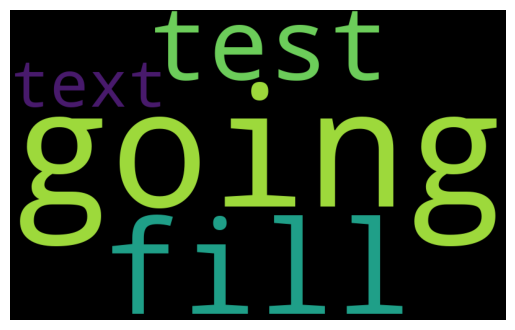

In [265]:
fig1 = plot_wordcloud(test_text)

Or plot the top-frenquency words that are most relvant in the text:

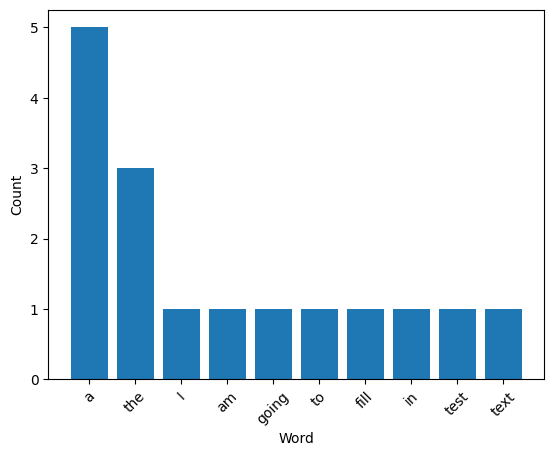

In [266]:
fig2 = plot_topwords(test_text)

It is also possible to plot both in one suite plot for illustration:

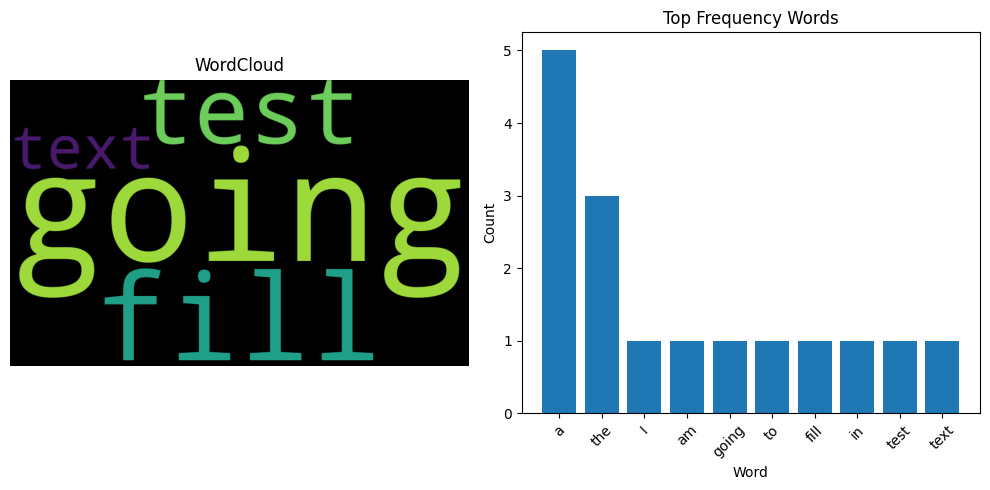

In [267]:
fig3 = plot_suite(test_text)